<a href="https://colab.research.google.com/github/Qisam0322/Prediction-of-Product-Sales/blob/main/Product_Sales_Preprocessing_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- SAM QI

#Preprocesing for Machine Learning

## Imports and load fresh data

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn import set_config
set_config(transform_output='pandas')

In [203]:
#Load fresh data
fname2='/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv'
df=pd.read_csv(fname2)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [205]:
df.shape

(8523, 12)

## Performing Preprocessing Steps

In [206]:
# Check duplicates
df.duplicated().sum()

0

In [207]:
# Check and fix inconsistancies
string_cols=df.select_dtypes('object').columns
for col in string_cols:
  print(f'Value count for {col}')
  print(df[col].value_counts())
  print('\n')

Value count for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value count for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value count for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT0

In [208]:
#Fix inconsistancies in 'Item_Fat_Content' column
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [209]:
#Check features data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Features data types are correct.

In [210]:
#Check duplicates
df.duplicated().sum()

0

No duplicates found.

In [211]:
#Check for impossible values in numercial columns
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,"7,060.00","8,523.00","8,523.00","8,523.00","8,523.00"
mean,12.86,0.07,140.99,"1,997.83","2,181.29"
std,4.64,0.05,62.28,8.37,"1,706.50"
min,4.55,0.00,31.29,"1,985.00",33.29
25%,8.77,0.03,93.83,"1,987.00",834.25
50%,12.60,0.05,143.01,"1,999.00","1,794.33"
75%,16.85,0.09,185.64,"2,004.00","3,101.30"
max,21.35,0.33,266.89,"2,009.00","13,086.96"


No impossible value found

In [212]:
#Check missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Found missing values in 'Item Weight' and 'Outlet Size'. Null values will be addressed after train test split to ensure no data leakage.

## Identify the features (X) and target (y)

In [213]:
#Identify X and y, drop the "Item_Identifier" feature
#because it has very high cardinality.
target='Item_Outlet_Sales'
X=df.drop(columns=target).drop(columns='Item_Identifier').copy()
y = df[target].copy()
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1


## Perform train test split

In [214]:
#Perform train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

## Create a preprocessing object to prepare the dataset for Machine Learning

### Create Simpleimputer to fill nulls

In [215]:
#Identify missing values
X_train.isna().sum()

Item_Weight                  1107
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1812
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [216]:
# Filling missing value for numerical column 'Item_Weight',
# upon further analyzing, nulls are missing at random.
# Decided to use 'median' to fill null values.
impute_median=SimpleImputer(strategy='median')

In [217]:
#Filling missing value for category(ordinal) column 'Outlet_Size'
#Decided to use 'MISSING' to fill nulls.
impute_na_ord=SimpleImputer(strategy='constant',fill_value='NA')

###Create preprocessing object for numeric columns

In [218]:
#define numeric columns
num_cols=X_train.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [219]:
#Create a StandardScaler
num_scaler=StandardScaler()

In [220]:
#create a pipline for numeric column
num_pip=make_pipeline(impute_median,num_scaler)
num_pip

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [221]:
#Create a tuple for each transformer
num_tuple=('numeric',num_pip,num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

###Create preprocessing object for ordinal columns

In [222]:
#define ordinal columns
ord_cols=['Outlet_Size']
ord_cols

['Outlet_Size']

In [223]:
#Create a StandardScaler
ord_scaler=StandardScaler()

In [224]:
#Create ordinal encoder
size_order=['NA','Small','Medium','High']
ordinal_category_orders=[size_order]
ord_encoder=OrdinalEncoder(categories=ordinal_category_orders)

In [225]:
#create a pipline for ordinal column
ord_pip=make_pipeline(impute_na_ord,ord_encoder,ord_scaler)
ord_pip


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['NA', 'Small', 'Medium',
                                             'High']])),
                ('standardscaler', StandardScaler())])

In [226]:
#Create a tuple for each transformer
ord_tuple=('ordinal',ord_pip,ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 'Small', 'Medium',
                                              'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

###Create preprocessing object for nominal columns

In [227]:
#define nominal columns
ohe_cols=X_train.select_dtypes('object').drop(columns=ord_cols).columns
ohe_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [228]:
#Create OneHotEncoder
ohe_encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [229]:
#Create a tuple for each transformer
ohe_tuple=('categories',ohe_encoder,ohe_cols)
ohe_tuple

('categories',
 OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

## Create column transformer

In [230]:
#Creat column transformer with tuples
preprocessor=ColumnTransformer([num_tuple,ord_tuple,ohe_tuple],verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categories',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [231]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

# Modeling

## Build a linear regression model to predict sales

In [232]:
#Import packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [233]:
#Model Evaluate function

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:

    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):

  y_train_pred = reg.predict(X_train)

  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  y_test_pred = reg.predict(X_test)
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    results_df = results_df.set_index('Label')
    results_df.index.name=None
    return results_df.round(3)


In [234]:
#Build a linear regression model
lin_reg=LinearRegression()
linreg_pip=make_pipeline(preprocessor,lin_reg)

In [235]:
#Fit model onto train data
linreg_pip.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                                   OrdinalEncoder(categories=[['NA',
                                                                                               'Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size']),
                                                 ('categories',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

###Custom evaluation function to get the metrics for the model

In [236]:
#Evaluate the model
evaluate_regression(linreg_pip,X_train,y_train,X_test,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.120
- MSE = 1,297,558.548
- RMSE = 1,139.104
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.048
- MSE = 1,194,230.406
- RMSE = 1,092.808
- R^2 = 0.567


### Compare the training vs. testing data R-squared values

The linear regression model preformed better on test data(R2=0.567) than train data(R2=0.562). R2 scores for the test data and train data is very close and can only explain about 56% of the variation in target 'price'. Therefore the model is a little underfit.

##Build a Random Forest model to predict sales

In [237]:
#Build a Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
rf_pip=make_pipeline(preprocessor,rf)

In [238]:
#Fit on train data
rf_pip.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size']),
                                                 ('categories',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

###Custom evaluation function to get the metrics for the model

In [239]:
evaluate_regression(rf_pip,X_train,y_train,X_test,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.120
- MSE = 182,642.045
- RMSE = 427.366
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 767.081
- MSE = 1,216,212.220
- RMSE = 1,102.820
- R^2 = 0.559


###Compare the training vs. test R-squared values

The default Random Forest model perform very well on the train data (R2=0.938) but poorly on test data(R2=0.559). The model is overfit and need tuning.

###Compare this model's performance to the linear regression model

By comparing the test data R^2 scores, linear regression model (R^2=0.567) has higer R^2 than random forest model (R^2=0.559)

##Use GridSearchCV to tune the Random Forest model

In [240]:
# Parameters for tuning
rf_pip.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['

In [241]:
#Define param grid try out differnt options
param={'randomforestregressor__max_depth':[1,5,15,25],
       'randomforestregressor__n_estimators':[50,100,200],
       'randomforestregressor__min_samples_leaf':[1,2,3,4]}


In [242]:
#Instantiate the gridsearch
grid_search=GridSearchCV(rf_pip,param,n_jobs=-1,cv=3,verbose=1)

In [243]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimpute...
                                                                         Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [1, 5, 15, 25],
                         'randomforestregressor__min_samples_leaf': [1, 2, 3,
                                                                     4],
                         'randomforestregressor__n_estimators': [50, 100, 200]},
             verbose=1)

In [244]:
#Check for best parameters
grid_search.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__n_estimators': 100}

###Fit and evaluate a final best model on the entire training set


In [245]:
best_model=grid_search.best_estimator_

In [246]:
evaluate_regression(best_model,X_train,y_train,X_test,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 755.408
- MSE = 1,152,598.974
- RMSE = 1,073.592
- R^2 = 0.611

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 728.426
- MSE = 1,096,412.715
- RMSE = 1,047.097
- R^2 = 0.603


###Compare your tuned model to your default Random Forest

After the tuning of the model, the new tuned model performs better with test data. We see an increase of R2 from 0.559 to 0.603

## Evaluation

Overall I would recommend using the tuned random forest model for prediction because the model has a higher R2 value on test data(R^2=0.603 rf > R^2=0.559 lr) and the model is less underfit than the default random forest model and less overfit than the linear regression model.

The tuned random forest model on test data has a R-squared value of 0.603 indicating that about 60.3% of the variance in 'Outlet Sales' can be explained by the features we're using in our model. The model does a reasonably good job at predicting outlet sales based on the features we provided. However, there are still other factors not included in our model that affect the target. So, while it's decent, there's room for improvement.

The tuned random forest model on test data has a RMSE of 1,047.097 indicating on average our prediction is off by about $1,047.

RMSE tends to penalize larger errors more. Test data has a RMSE of 1,047.097 that is higher than the MAE of 728.426 suggests that there might be some predictions that are quite far off. RMSE delivers more insight regarding about the large error predictions.

The R2 scores for both test and train data of tuned random forest model is very close and model can explain around 60% of the varibility in Outlet sales with features provided. This indicates that the model has decent performance with little underfitting for improvment.

## Feature Importances and Visualizing Coefficient

### Visualizing coefficient - LinearRegression

In [247]:
#Get Coefficient
feature_names=linreg_pip[0].get_feature_names_out()
coeffs=pd.Series(linreg_pip[-1].coef_,index=feature_names)
coeffs=coeffs.sort_values(ascending=True)

In [248]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs

Outlet_Type_Supermarket Type2     -2,591,196,026,705,256.00
Outlet_Type_Supermarket Type1     -2,258,126,868,326,488.50
Outlet_Identifier_OUT010          -1,313,308,279,893,328.50
Outlet_Identifier_OUT018            -834,342,711,814,695.50
Outlet_Type_Grocery Store           -784,265,296,367,903.25
Outlet_Identifier_OUT027            -477,844,026,495,108.81
Outlet_Type_Supermarket Type3       -476,722,400,930,178.50
Outlet_Identifier_OUT017            -430,139,030,764,478.00
Outlet_Location_Type_Tier 2         -364,728,726,046,505.94
Outlet_Identifier_OUT035            -218,985,585,049,194.00
Outlet_Identifier_OUT049            -209,603,930,874,208.69
Outlet_Identifier_OUT019            -144,346,894,859,169.00
Item_Type_Dairy                     -137,411,726,062,350.00
Item_Type_Soft Drinks               -137,411,726,062,283.55
Item_Type_Breads                    -137,411,726,062,272.88
Item_Type_Others                    -137,411,726,062,270.72
Item_Type_Snack Foods               -137

Noticed there are huge numbers, I will handle multicollinearity by using drop='first' in OneHotEncoder with nominal features.

In [249]:
#addressing the multicollinearity in all our categorical features
# by using drop = 'first'
ohe_encoder_coeffs=OneHotEncoder(sparse_output=False,drop='first')
ohe_tuple_coeffs=('categories',ohe_encoder_coeffs,ohe_cols)
preprocessor_coeffs=ColumnTransformer([num_tuple,ord_tuple,ohe_tuple_coeffs],verbose_feature_names_out=False)
preprocessor_coeffs

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['NA',
                                                                              'Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categories',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [264]:
#Create a new pipeline and fit on training data
lin_reg_pipe_coeffs=make_pipeline(preprocessor_coeffs,LinearRegression())
lin_reg_pipe_coeffs.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                                   OrdinalEncoder(categories=[['NA',
                                                                                               'Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size']),
                                                 ('categories',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [267]:
#Get coeffs from the new model with drop='first' for multicollinearity
feature_names=lin_reg_pipe_coeffs[0].get_feature_names_out()
coeffs_dropfirst=pd.Series(lin_reg_pipe_coeffs[-1].coef_,index=feature_names)
coeffs_dropfirst=coeffs_dropfirst.sort_values(ascending=True)

In [268]:
coeffs_dropfirst

Outlet_Type_Supermarket Type1     -2,802,533,635,874,159.50
Outlet_Identifier_OUT018          -2,028,310,560,894,618.75
Outlet_Type_Supermarket Type2     -1,970,907,249,834,724.50
Outlet_Location_Type_Tier 3       -1,277,905,018,272,576.75
Outlet_Identifier_OUT035            -782,960,225,933,315.12
Outlet_Identifier_OUT049            -681,415,590,551,673.88
Outlet_Identifier_OUT017            -307,548,882,757,234.38
Item_Type_Dairy                                     -106.84
Item_Type_Soft Drinks                                -39.67
Item_Type_Breads                                     -29.78
Item_Type_Others                                     -26.67
Item_Type_Snack Foods                                -21.84
Item_Visibility                                      -21.50
Item_Type_Meat                                       -11.68
Item_Weight                                           -7.87
Item_Type_Frozen Foods                                -1.63
Item_Type_Household                     

The coefficients values are more reasonable after addressing multicollinearity.

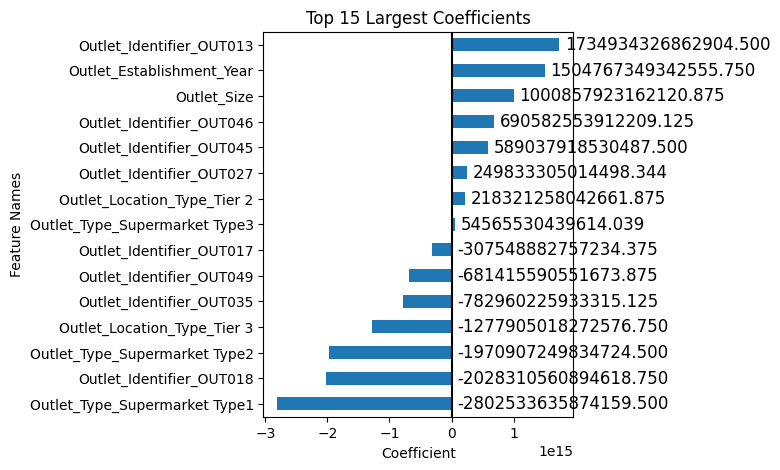

In [270]:
#Load customized functions for ploting coefficients
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)
def plot_coeffs(coeffs, top_n=None, figsize=(4,5),
                intercept=False, intercept_name="intercept",
                annotate=False, ha='left', va='center', size=12,
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)

        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

plot_coeffs(coeffs_dropfirst, top_n=15, annotate=True);

- Products being in 'Outlet type supermarket type1' decrease product sales by 2,802,533,635,874,159.50

- Products beining in Outlet store #018 decrease product sales by 2,028,310,560,894,618.75

- Products being in Outlet Type Supermarket Type2 decrease product sales by 1,970,907,249,834,724.50

### Feature Importances - Random Forest

In [254]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6),
                          color_dict=None, ax=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax



In [255]:
#Get feature importances on tuned random forest model
feature_names=best_model[0].get_feature_names_out()
importances=pd.Series(best_model[-1].feature_importances_,index=feature_names)
importances

Item_Weight                       0.00
Item_Visibility                   0.00
Item_MRP                          0.55
Outlet_Establishment_Year         0.03
Outlet_Size                       0.00
Item_Fat_Content_Low Fat          0.00
Item_Fat_Content_Regular          0.00
Item_Type_Baking Goods            0.00
Item_Type_Breads                  0.00
Item_Type_Breakfast               0.00
Item_Type_Canned                  0.00
Item_Type_Dairy                   0.00
Item_Type_Frozen Foods            0.00
Item_Type_Fruits and Vegetables   0.00
Item_Type_Hard Drinks             0.00
Item_Type_Health and Hygiene      0.00
Item_Type_Household               0.00
Item_Type_Meat                    0.00
Item_Type_Others                  0.00
Item_Type_Seafood                 0.00
Item_Type_Snack Foods             0.00
Item_Type_Soft Drinks             0.00
Item_Type_Starchy Foods           0.00
Outlet_Identifier_OUT010          0.00
Outlet_Identifier_OUT013          0.00
Outlet_Identifier_OUT017 

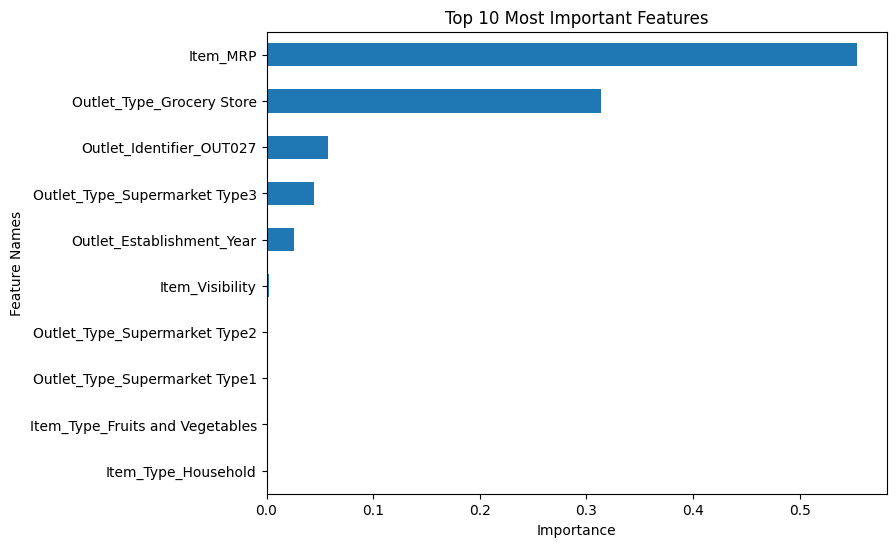

In [256]:
#Plot feature importances
plot_importance_color_ax(importances, top_n=10);

The top 5 most important features are:
- Item_MRP
- Outlet_type_grocery store
- Outlet_Identifier_OUT027
- Outlet_Type_Supermarket Type3
- Outlet_Establishment_Year
